In [3]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [9]:
HDR_PATH = '../data/iphone_808080_1_2023-07-12_002/results/REFLECTANCE_2023-07-12_002.hdr'

HDR_PATH_808080 = '../data/huawei_808080_2023-07-24_010/results/REFLECTANCE_huawei_808080_2023-07-24_010.hdr'
HDR_PATH_999999 = '../data/huawei_999999_2023-07-24_011/results/REFLECTANCE_huawei_999999_2023-07-24_011.hdr'
HDR_PATH_99ffcc = '../data/huawei_99ffcc_2023-07-24_012/results/REFLECTANCE_huawei_99ffcc_2023-07-24_012.hdr'

IMG_PATH_1 = '../data/huawei_808080_2023-07-24_010/results/REFLECTANCE_huawei_808080_2023-07-24_010.png'
IMG_PATH_2 = '../data/huawei_999999_2023-07-24_011/results/REFLECTANCE_huawei_999999_2023-07-24_011.png'
IMG_PATH_3 = '../data/huawei_99ffcc_2023-07-24_012/results/REFLECTANCE_huawei_99ffcc_2023-07-24_012.png'

In [10]:
spec_img_1 = envi.open(HDR_PATH_808080)
spec_img_2 = envi.open(HDR_PATH_999999)
spec_img_3 = envi.open(HDR_PATH_99ffcc)

In [11]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

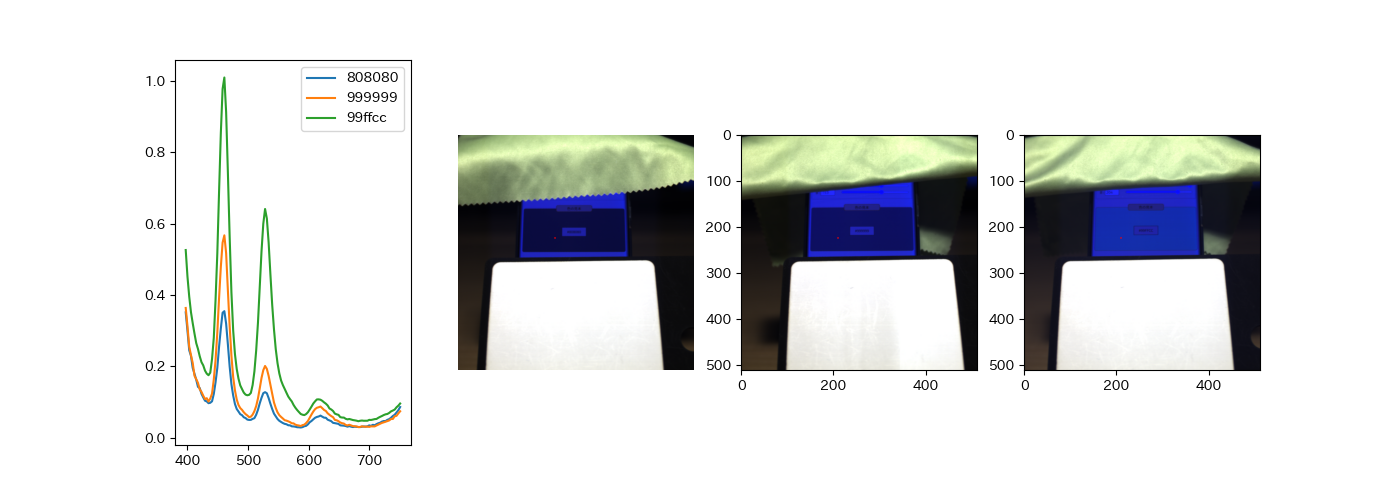

In [13]:
pixel_x = 210 # X座標
pixel_y = 225  # Y座標
color = (255, 0, 0)  # 色(RGB値)

range=[-1,0,1]
image_i = Image.open(IMG_PATH_1)
for i in range:
    for j in range:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_2)
for i in range:
    for j in range:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_3)
for i in range:
    for j in range:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_1 = spec_img_1.read_pixel(512-pixel_x,pixel_y)[:121]
y_2 = spec_img_2.read_pixel(512-pixel_x,pixel_y)[:121]
y_3 = spec_img_3.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_1,label='808080')
ax1.plot(x,y_2,label='999999')
ax1.plot(x,y_3,label='99ffcc')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [15]:
ex_max_1 = argrelmax(y_1,order=3)
ex_max_2 = argrelmax(y_2,order=3)
ex_max_3 = argrelmax(y_3,order=3)
print(ex_max_1,ex_max_2,ex_max_3)

(array([22, 45, 76]),) (array([22, 45, 76, 99]),) (array([22, 45, 75, 99]),)


In [16]:
for elem in ex_max_1[0]:
    print(y_1[elem])

0.35472372
0.12799402
0.062425684


In [17]:
for i in ex_max_2[0]:
    print(y_2[i])

0.5668663
0.2013256
0.08777633
0.032526474


In [18]:
for i in ex_max_3[0]:
    print(y_3[i])

1.0085763
0.6405904
0.10785463
0.04859685
